In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset w7.csv')
df

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21
5,female,completed,40
6,male,none,30
7,female,none,12
8,male,none,18
9,male,none,24


### 1. Carry out descriptive analytics on the dataset.

In [3]:
df.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            28 non-null     object
 1   Test preparation  28 non-null     object
 2   Total Marks       28 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 800.0+ bytes


In [5]:
df.isnull().sum()

Gender              0
Test preparation    0
Total Marks         0
dtype: int64

In [6]:
df.isna().sum()

Gender              0
Test preparation    0
Total Marks         0
dtype: int64

In [7]:
df_gender = df.groupby('Gender')['Total Marks']
df_gender.describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
female,16.0,33.750000,12.865976,12.0,25.50,39.0,43.50,50.0
male,12.0,30.416667,12.168950,14.0,21.75,29.0,43.25,47.0


<AxesSubplot:xlabel='Gender', ylabel='count'>

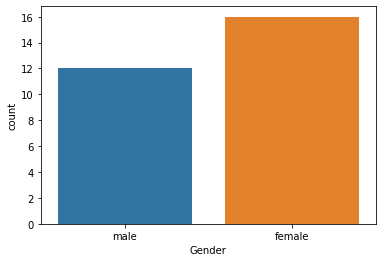

In [8]:
sns.countplot(data = df, x = 'Gender', )

<AxesSubplot:xlabel='Total Marks', ylabel='Count'>

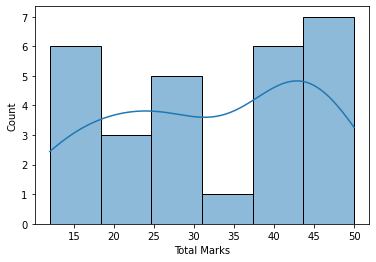

In [13]:
sns.histplot(df['Total Marks'],kde=True)

In [ ]:
H0 : Female and male students score same marks
H1 : Female and male students doesnt score same marks

In [15]:
from scipy.stats import ttest_ind
alpha = 0.05
female = df[df['Gender']=='female']['Total Marks']
female

1     28
2     18
3     48
4     21
5     40
7     12
14    41
15    13
16    48
17    45
22    41
23    27
24    27
25    38
26    50
27    43
Name: Total Marks, dtype: int64

In [17]:
alpha = 0.05
male = df[df['Gender']=='male']['Total Marks']
male

0     14
6     30
8     18
9     24
10    44
11    23
12    43
13    28
18    47
19    36
20    14
21    44
Name: Total Marks, dtype: int64

In [18]:
_,p = ttest_ind(male,female)
print("p value :", p)
if p < alpha:
    print("Rejecting the  H0")
else:
    print("Failed to reject the H0.")

p value : 0.4937822317960763
Failed to reject the H0.


### 3. Whether test preparation helps the students

In [19]:
alpha = 0.05
no_test = df[df['Test preparation']=='none']['Total Marks']
no_test

0     14
1     28
2     18
3     48
4     21
6     30
7     12
8     18
9     24
11    23
13    28
14    41
15    13
17    45
18    47
19    36
20    14
22    41
23    27
24    27
25    38
Name: Total Marks, dtype: int64

In [20]:
comp_test = df[df['Test preparation']=='completed']['Total Marks']
comp_test

5     40
10    44
12    43
16    48
21    44
26    50
27    43
Name: Total Marks, dtype: int64

In [21]:
_,p =ttest_ind(no_test,comp_test)
print("p value",p)
if p<alpha:
    print("Rejecting H0")
else:
    print("Failed to reject H0")

p value 0.0012671292457320106
Rejecting H0
